In [1]:
import numpy as np
import pandas as pd

In [69]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\movie_data\movies.csv")

##### Q. What is the shape of "movies.csv"?

In [4]:
movies.shape

(9742, 3)

In [5]:
ratings = pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\movie_data\ratings.csv")

##### Q. What is the shape of "ratings.csv"?

In [6]:
ratings.shape

(100836, 4)

##### Q. How many unique "userId" are available in "ratings.csv"?

In [7]:
ratings['userId'].nunique()

610

##### Q. Which movie has recieved maximum number of user ratings?

In [9]:
movie_ratings=movies.merge(ratings, how='outer', on='movieId')

In [12]:
rating_count = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())

In [14]:
rating_count.sort_values('rating')

,rating
title,
"Chosen, The (1981)",0
I Know Where I'm Going! (1945),0
Mutiny on the Bounty (1962),0
Twentieth Century (1934),0
Chalet Girl (2011),0
...,...
"Matrix, The (1999)",278
"Silence of the Lambs, The (1991)",279
Pulp Fiction (1994),307


Forrest Gump (1994)	with 329 ratings has recieved maximum number of user ratings

##### Q. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [15]:
tags=pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\movie_data\tags.csv")

In [18]:
movie_tags = movies.merge(tags, how='inner', on='movieId')

In [19]:
movie_tags[movie_tags['title']=='Matrix, The (1999)']

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


martial arts, sci-fi, alternate universe, philosophy, post apocalyptic are the tags to the movie "Matrix"

##### Q. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [30]:
movie_ratings[movie_ratings['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

##### Q. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

C:\Users\91852\AppData\Local\Temp\ipykernel_139612\3299030811.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_ratings[movie_ratings.title == 'Fight Club (1999)']['rating'])


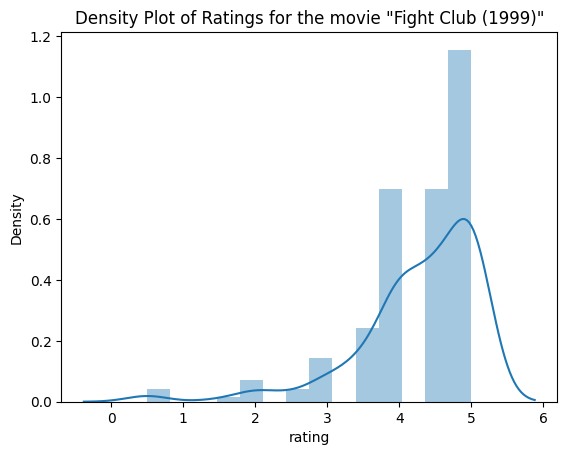

In [72]:
sns.distplot(movie_ratings[movie_ratings.title == 'Fight Club (1999)']['rating'])
plt.title('Density Plot of Ratings for the movie "Fight Club (1999)"')
plt.show()

--------------------------------------------------

##### 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [34]:
agg_ratings = movie_ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

##### 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [37]:
agg_ratings.merge(movies, on='movieId')

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,1,3.500000,Flint (2017),Drama
9740,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


##### 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [40]:
filtered = agg_ratings[agg_ratings['count']>50].merge(movies, on='movieId')

In [41]:
filtered

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller
4,7,54,3.185185,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...
431,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
432,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX
434,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


##### Q. Which movie is the most popular based on  average user ratings?

In [74]:
filtered.sort_values('mean')

,movieId,count,mean,title,genres
260,2701,53,2.207547,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western
73,435,63,2.420635,Coneheads (1993),Comedy|Sci-Fi
71,432,55,2.645455,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western
36,173,62,2.669355,Judge Dredd (1995),Action|Crime|Sci-Fi
35,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
...,...,...,...,...,...
111,750,97,4.268041,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
169,1276,57,4.271930,Cool Hand Luke (1967),Drama
273,2959,218,4.272936,Fight Club (1999),Action|Crime|Drama|Thriller
117,858,192,4.289062,"Godfather, The (1972)",Crime|Drama


Shawshank Redemption, The (1994) with 4.429022 avg rating

##### Q. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [76]:
filtered.sort_values('count')

,movieId,count,mean,title,genres
26,145,51,3.245098,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller
153,1215,51,4.039216,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror
228,2100,51,3.117647,Splash (1984),Comedy|Fantasy|Romance
314,4239,51,3.813725,Blow (2001),Crime|Drama
322,4776,51,3.794118,Training Day (2001),Crime|Drama|Thriller
...,...,...,...,...,...
248,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
99,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
49,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
53,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama


Matrix, The (1999), Silence of the Lambs, The (1991), Pulp Fiction (1994), Shawshank Redemption, The (1994), Forrest Gump (1994)

##### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [79]:
filtered[filtered['genres'].str.contains('Sci-Fi')].sort_values('count')

,movieId,count,mean,title,genres
386,45499,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
35,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
260,2701,53,2.207547,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western
107,673,53,2.707547,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...
435,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi
...,...,...,...,...,...
140,1196,211,4.215640,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
96,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi
80,480,238,3.750000,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
44,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


------------------------------------------------

In [32]:
links = pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\movie_data\links.csv")

In [50]:
imdb_fil = filtered.merge(links, on='movieId')

In [31]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', {'class' : "sc-bde20123-1 cMEQkK"})
    return imdb_rating.text if imdb_rating else np.nan

In [57]:
imdb_rating = []
for i in imdb_fil['imdbId']:
    imdb_rating.append(scrapper(i))

In [62]:
imdb_fil['IMDB_rating']=imdb_rating

##### Q. Mention the movieId of the movie which has the highest IMDB rating.

In [65]:
imdb_fil.sort_values('IMDB_rating')

,movieId,count,mean,title,genres,imdbId,tmdbId,IMDB_rating
260,2701,53,2.207547,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,120891,8487.0,4.9
30,160,57,2.877193,Congo (1995),Action|Adventure|Mystery|Sci-Fi,112715,10329.0,5.3
28,153,137,2.916058,Batman Forever (1995),Action|Adventure|Comedy|Crime,112462,414.0,5.4
73,435,63,2.420635,Coneheads (1993),Comedy|Sci-Fi,106598,9612.0,5.4
70,420,59,2.720339,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,109254,306.0,5.5
...,...,...,...,...,...,...,...,...
146,1203,57,4.149123,12 Angry Men (1957),Drama,50083,389.0,9.0
407,58559,149,4.238255,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,468569,155.0,9.0
86,527,220,4.225000,Schindler's List (1993),Drama|War,108052,424.0,9.0
117,858,192,4.289062,"Godfather, The (1972)",Crime|Drama,68646,238.0,9.2


##### Q. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [90]:
imdb_fil[imdb_fil['genres'].str.contains('Sci-Fi')].sort_values('IMDB_rating')

,movieId,count,mean,title,genres,imdbId,tmdbId,IMDB_rating
260,2701,53,2.207547,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,120891,8487.0,4.9
30,160,57,2.877193,Congo (1995),Action|Adventure|Mystery|Sci-Fi,112715,10329.0,5.3
73,435,63,2.420635,Coneheads (1993),Comedy|Sci-Fi,106598,9612.0,5.4
36,173,62,2.669355,Judge Dredd (1995),Action|Crime|Sci-Fi,113492,9482.0,5.6
35,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,113481,9886.0,5.6
...,...,...,...,...,...,...,...,...
44,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,8.6
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0,8.7
140,1196,211,4.215640,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,8.7
248,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller,133093,603.0,8.7


In [104]:
movies[movies['movieId']==79132]

,movieId,title,genres
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
